## Library

In [100]:
import random
import numpy as np
from scipy import stats

def normal_sample(low, high, interval):
    if (low > high) or (high < low):
        raise ValueError
    if low == high:
        return low
    else:
        mu = (high + low) / 2
        cdf_value = 0.5 + 0.5 * interval
        normed_sigma = stats.norm.ppf(cdf_value)
        sigma = (high - mu) / normed_sigma
        return np.random.normal(mu, sigma)


def rand(var):
    return normal_sample(var[0], var[1], CREDIBILITY_INTERVAL)


def numerize(oom_num):
    oom_num = int(oom_num)
    ooms = ['thousand', 'million', 'billion', 'trillion', 'quadrillion', 'quintillion', 'sextillion', 'septillion', 'octillion', 'nonillion', 'decillion']

    if oom_num == 0:
        return 'one'
    elif oom_num == 1:
        return 'ten'
    elif oom_num == 2:
        return 'hundred'
    elif oom_num > 35:
        return numerize(oom_num - 33) + ' decillion'
    elif oom_num < 0:
        return 'negative ' + numerize(-oom_num)
    elif oom_num % 3 == 0:
        return 'one ' + ooms[(oom_num // 3) - 1]
    else:
        return str(10 ** (oom_num % 3)) + ' ' + ooms[(oom_num // 3) - 1]
    
print('Loaded')

Loaded


## Variables

In [101]:
RUNS = 100
MAX_YEAR = 2200
USE_NUMBERS = 'Ajeya'
CREDIBILITY_INTERVAL = 0.9


if USE_NUMBERS == 'Ajeya':
    chance_ai_possible = 1              # What is the chance that Human-Level AI is possible in principle?
    chance_ai_abandoned = 0             # What is the chance that Human-Level AI is somehow abandoned?
    tai_flop_size = [14, 20]            # 90% CI - at how many inference FLOPS would we get transformative capabilities? In 10^X FLOPS for inference
    horizon = [0, 5]                    # 90% CI, this is the value of H for below
    train_inference_ratio = [14, 14]    # 90% CI, if an algorithm does Y FLOPS of inference it will take 10^H * 10^X * Y FLOPS to train it
    algo_dbl_yrs = [2, 3]               # 90% CI, every X years our algorithms get twice as efficient
    algo_dbl_diminish = [1, 1]          # 90% CI, how much does algorithmic progress per year diminish per year?
    flop_dollar = [17, 17]              # 90% CI, currently we can purchase 10^X FLOPS for $1
    flop_halv_yrs = [2, 3]              # 90% CI, every X years each FLOP becomes half as expensive to purchase
    flop_halv_diminish = [1, 1]         # 90% CI, how much does FLOP/$ progress per year diminish per year?
    pay_tai = [9, 11]                   # 90% CI, $10^X in 2022 dollars is the maximum amount someone will pay for producing AI
    pay_growth = [1.03, 1.03]           # 90% CI, our willingess to pay for TAI goes up by this amount per year
    pay_cap = [12, 12]                  # 90% CI, 10^X is the maximum amount of 2022$ we are willing to spend on TAI

elif USE_NUMBERS == 'Peter':
    chance_ai_possible = 0.97
    chance_ai_abandoned = 0.01
    tai_flop_size = [12, 22]
    horizon = [0, 5]
    train_inference_ratio = [13, 15]
    algo_dbl_yrs = [2, 3]
    algo_dbl_diminish = [0.98, 1]
    flop_dollar = [17, 18]
    flop_halv_yrs = [2, 3]
    flop_halv_diminish = [0.98, 1]
    pay_tai = [8, 11]
    pay_growth = [1.01, 1.03]
    pay_cap = [12, 16]

print('Loaded')


Loaded


## Run Model

In [102]:
tai_years = []

for r in range(RUNS):
    print('## RUN {}/{}'.format(r+1, RUNS))
    tai_created = False
    tai_year = 9999
    if random.random() > chance_ai_possible:
        print('In this run, human-level AI is not possible - even in principle.')
    elif random.random() < chance_ai_abandoned:
        print('In this run, the quest for human-level AI is somehow permanently abandoned.')
    else:
        tai_flop_size_ = rand(tai_flop_size); print('It takes {} FLOPS for inference for transformative capabilities.'.format(numerize(tai_flop_size_)))
        horizon_ = rand(horizon); train_inference_ratio_ = rand(train_inference_ratio); train_inference_ratio_ += horizon_
        print('An algorithm doing Y FLOPS of inference takes {} * Y FLOPS to train'.format(numerize(train_inference_ratio_)))
        algo_dbl_yrs_ = rand(algo_dbl_yrs); algo_dbl_diminish_ = rand(algo_dbl_diminish)
        print('Every {} years algorithms get twice as efficient, but this diminishes {}x per year.'.format(np.round(algo_dbl_yrs_, 1), np.round(algo_dbl_diminish_, 2)))
        flop_halv_yrs_ = rand(flop_halv_yrs); flop_halv_diminish_ = rand(flop_halv_diminish)
        print('Every {} years FLOPs get twice as cheap, but this diminishes {}x per year.'.format(np.round(flop_halv_yrs_, 1), np.round(flop_halv_diminish_, 2)))
        pay_tai_ = rand(pay_tai); pay_growth_ = rand(pay_growth); pay_cap_ = rand(pay_cap)
        print('We are willing to pay {} 2022$ for TAI and this increases {}x per year to a max of {} 2022$.'.format(numerize(pay_tai_), np.round(pay_growth_, 2), numerize(pay_cap_)))
        flop_dollar_ = rand(flop_dollar)
        print('---')
        for yr in range(2022, MAX_YEAR):
            if not tai_created:
                print('YEAR {}'.format(yr))
                algo_doublings = ((yr - 2022) / algo_dbl_yrs_) * (algo_dbl_diminish_ ** (yr - 2022))
                algo_doublings_log = np.log(algo_doublings)
                flop_halvings = ((yr - 2022) / flop_halv_yrs_) * (flop_halv_diminish_ ** (yr - 2022))
                flop_halvings_log =  np.log(flop_halvings)
                if flop_halvings_log > 0:
                    flop_dollar__ = flop_dollar_ + flop_halvings_log
                else:
                    flop_dollar__ = flop_dollar_
                if algo_doublings_log > 0:
                    tai_flop_size__ = tai_flop_size_ - algo_doublings_log
                else:
                    tai_flop_size__ = tai_flop_size_
                print('FLOPS currently cost {} FLOPS per 2022$'.format(numerize(flop_dollar__)))
                flops_needed = tai_flop_size__ + train_inference_ratio_
                cost = tai_flop_size__ + train_inference_ratio_ - flop_dollar__
                print('So we need {} FLOPS to implement TAI and this will cost {} 2022$'.format(numerize(flops_needed), numerize(cost)))
                pay_tai__ = pay_tai_ + (pay_growth_ ** (yr - 2022) - 1)
                if pay_tai__ > pay_cap_:
                    pay_tai__ = pay_cap_
                print('We are willing to pay {} 2022$'.format(numerize(pay_tai__)))
                if cost <= pay_tai__:
                    print('/!\ TAI CREATED!')
                    tai_created = True
                    tai_year = yr
                print('---')
    tai_years.append(tai_year)
    print('---')
    print('---')

## RUN 1/100
It takes one quintillion FLOPS for inference for transformative capabilities.
An algorithm doing Y FLOPS of inference takes one quadrillion * Y FLOPS to train
Every 2.1 years algorithms get twice as efficient, but this diminishes 1x per year.
Every 2.4 years FLOPs get twice as cheap, but this diminishes 1x per year.
We are willing to pay 100 billion 2022$ for TAI and this increases 1.03x per year to a max of one trillion 2022$.
---
YEAR 2022
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 quadrillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2023
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 quadrillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2024
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 quadrillion 2022$
We are wil

We are willing to pay one billion 2022$
---
YEAR 2034
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 100 octillion FLOPS to implement TAI and this will cost 10 billion 2022$
We are willing to pay one billion 2022$
---
YEAR 2035
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 100 octillion FLOPS to implement TAI and this will cost 10 billion 2022$
We are willing to pay one billion 2022$
---
YEAR 2036
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 100 octillion FLOPS to implement TAI and this will cost 10 billion 2022$
We are willing to pay one billion 2022$
---
YEAR 2037
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 100 octillion FLOPS to implement TAI and this will cost 10 billion 2022$
We are willing to pay one billion 2022$
---
YEAR 2038
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 100 octillion FLOPS to implement TAI and this will cost 10 billion 2022$
We are willing to pay one billion 2022$
---
Y

<ipython-input-102-062428a704d3>:27: RuntimeWarning: divide by zero encountered in log
  algo_doublings_log = np.log(algo_doublings)
<ipython-input-102-062428a704d3>:29: RuntimeWarning: divide by zero encountered in log
  flop_halvings_log =  np.log(flop_halvings)



An algorithm doing Y FLOPS of inference takes one quadrillion * Y FLOPS to train
Every 2.6 years algorithms get twice as efficient, but this diminishes 1x per year.
Every 2.3 years FLOPs get twice as cheap, but this diminishes 1x per year.
We are willing to pay 10 billion 2022$ for TAI and this increases 1.03x per year to a max of one trillion 2022$.
---
YEAR 2022
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 quadrillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2023
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 quadrillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2024
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 quadrillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2025
FLOPS currently cost 100 quadrillion FLOPS per 202

So we need 100 nonillion FLOPS to implement TAI and this will cost one trillion 2022$
We are willing to pay one trillion 2022$
---
YEAR 2171
FLOPS currently cost 100 quintillion FLOPS per 2022$
So we need 100 nonillion FLOPS to implement TAI and this will cost 100 billion 2022$
We are willing to pay one trillion 2022$
/!\ TAI CREATED!
---
---
---
## RUN 12/100
It takes one quintillion FLOPS for inference for transformative capabilities.
An algorithm doing Y FLOPS of inference takes one quintillion * Y FLOPS to train
Every 2.3 years algorithms get twice as efficient, but this diminishes 1x per year.
Every 2.1 years FLOPs get twice as cheap, but this diminishes 1x per year.
We are willing to pay 100 billion 2022$ for TAI and this increases 1.03x per year to a max of one trillion 2022$.
---
YEAR 2022
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need 10 thousand decillion FLOPS to implement TAI and this will cost 100 quintillion 2022$
We are willing to pay 100 billion 2022$
-

So we need 10 decillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one trillion 2022$
---
YEAR 2081
FLOPS currently cost 100 quintillion FLOPS per 2022$
So we need 10 decillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one trillion 2022$
---
YEAR 2082
FLOPS currently cost 100 quintillion FLOPS per 2022$
So we need 10 decillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one trillion 2022$
---
YEAR 2083
FLOPS currently cost 100 quintillion FLOPS per 2022$
So we need 10 decillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one trillion 2022$
---
YEAR 2084
FLOPS currently cost 100 quintillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one trillion 2022$
---
YEAR 2085
FLOPS currently cost 100 quintillion FLOPS per 2022$
So we need one decillion FLOPS to imple

FLOPS currently cost 100 quintillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one trillion 2022$
---
YEAR 2083
FLOPS currently cost 100 quintillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one trillion 2022$
---
YEAR 2084
FLOPS currently cost 100 quintillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one trillion 2022$
---
YEAR 2085
FLOPS currently cost 100 quintillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one trillion 2022$
---
YEAR 2086
FLOPS currently cost 100 quintillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one trillion 2022$
---
YEAR 2087
FLOPS currently cost 100 quintillio

FLOPS currently cost one quintillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 100 trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2034
FLOPS currently cost one quintillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 100 trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2035
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 100 nonillion FLOPS to implement TAI and this will cost 100 trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2036
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 100 nonillion FLOPS to implement TAI and this will cost 100 trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2037
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 100 nonillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2038
FLOPS currently cost one quintillion

Every 2.8 years FLOPs get twice as cheap, but this diminishes 1x per year.
We are willing to pay 10 billion 2022$ for TAI and this increases 1.03x per year to a max of one trillion 2022$.
---
YEAR 2022
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need 100 decillion FLOPS to implement TAI and this will cost one quintillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2023
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need 100 decillion FLOPS to implement TAI and this will cost one quintillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2024
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need 100 decillion FLOPS to implement TAI and this will cost one quintillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2025
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need 100 decillion FLOPS to implement TAI and this will cost one quintillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2026
FLOPS currently 

FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need 100 nonillion FLOPS to implement TAI and this will cost 100 trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2029
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2030
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2031
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2032
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2033
FLOPS currently cost one quintillion FLOPS 

YEAR 2036
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 100 nonillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2037
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 100 nonillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2038
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 100 nonillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2039
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 100 nonillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2040
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost one trillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2041
FLOPS currently cost 10 quintill

Every 2.6 years FLOPs get twice as cheap, but this diminishes 1x per year.
We are willing to pay one billion 2022$ for TAI and this increases 1.03x per year to a max of one trillion 2022$.
---
YEAR 2022
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need 100 octillion FLOPS to implement TAI and this will cost one trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2023
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need 100 octillion FLOPS to implement TAI and this will cost one trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2024
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need 100 octillion FLOPS to implement TAI and this will cost one trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2025
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need 100 octillion FLOPS to implement TAI and this will cost one trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2026
FLOPS currently cost 100 

We are willing to pay 10 billion 2022$
---
YEAR 2049
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need one nonillion FLOPS to implement TAI and this will cost 10 billion 2022$
We are willing to pay 10 billion 2022$
/!\ TAI CREATED!
---
---
---
## RUN 54/100
It takes 100 quadrillion FLOPS for inference for transformative capabilities.
An algorithm doing Y FLOPS of inference takes 100 trillion * Y FLOPS to train
Every 2.1 years algorithms get twice as efficient, but this diminishes 1x per year.
Every 2.1 years FLOPs get twice as cheap, but this diminishes 1x per year.
We are willing to pay 10 billion 2022$ for TAI and this increases 1.03x per year to a max of one trillion 2022$.
---
YEAR 2022
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need 100 nonillion FLOPS to implement TAI and this will cost one quadrillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2023
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need 100 nonillion FLOPS to imple

We are willing to pay 100 billion 2022$
---
YEAR 2053
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost 100 billion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2054
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost 100 billion 2022$
We are willing to pay 100 billion 2022$
/!\ TAI CREATED!
---
---
---
## RUN 56/100
It takes 100 trillion FLOPS for inference for transformative capabilities.
An algorithm doing Y FLOPS of inference takes 10 quadrillion * Y FLOPS to train
Every 2.3 years algorithms get twice as efficient, but this diminishes 1x per year.
Every 2.6 years FLOPs get twice as cheap, but this diminishes 1x per year.
We are willing to pay 100 billion 2022$ for TAI and this increases 1.03x per year to a max of one trillion 2022$.
---
YEAR 2022
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need one nonillion FLOPS to implemen

Every 1.9 years algorithms get twice as efficient, but this diminishes 1x per year.
Every 2.2 years FLOPs get twice as cheap, but this diminishes 1x per year.
We are willing to pay 10 billion 2022$ for TAI and this increases 1.03x per year to a max of one trillion 2022$.
---
YEAR 2022
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 quadrillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2023
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 quadrillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2024
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 quadrillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2025
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost one quadrill

Every 2.4 years algorithms get twice as efficient, but this diminishes 1x per year.
Every 2.4 years FLOPs get twice as cheap, but this diminishes 1x per year.
We are willing to pay 10 billion 2022$ for TAI and this increases 1.03x per year to a max of one trillion 2022$.
---
YEAR 2022
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need 10 decillion FLOPS to implement TAI and this will cost 100 quadrillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2023
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need 10 decillion FLOPS to implement TAI and this will cost 100 quadrillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2024
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need 10 decillion FLOPS to implement TAI and this will cost 100 quadrillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2025
FLOPS currently cost 100 quadrillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 quadrilli

We are willing to pay one billion 2022$
---
YEAR 2043
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 100 trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2044
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 100 trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2045
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 100 trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2046
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2047
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need one decillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay one billion 2022$
--

YEAR 2049
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 100 nonillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2050
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 100 nonillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2051
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 100 nonillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2052
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 100 nonillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2053
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 100 nonillion FLOPS to implement TAI and this will cost 10 trillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2054
FLOPS currently cost 10 quintillion

FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost one trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2043
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost one trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2044
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost one trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2045
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost one trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2046
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost one trillion 2022$
We are willing to pay one billion 2022$
---
YEAR 2047
FLOPS currently cost 10 quintillion FLOPS per

FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost one trillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2051
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost one trillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2052
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost one trillion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2053
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost 100 billion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2054
FLOPS currently cost 10 quintillion FLOPS per 2022$
So we need 10 nonillion FLOPS to implement TAI and this will cost 100 billion 2022$
We are willing to pay 100 billion 2022$
---
YEAR 2055
FLOPS currently cost 10 quintillion FLOPS per 2

FLOPS currently cost one quintillion FLOPS per 2022$
So we need 10 decillion FLOPS to implement TAI and this will cost 10 quadrillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2035
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 10 decillion FLOPS to implement TAI and this will cost 10 quadrillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2036
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 10 decillion FLOPS to implement TAI and this will cost one quadrillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2037
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 10 decillion FLOPS to implement TAI and this will cost one quadrillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2038
FLOPS currently cost one quintillion FLOPS per 2022$
So we need 10 decillion FLOPS to implement TAI and this will cost one quadrillion 2022$
We are willing to pay 10 billion 2022$
---
YEAR 2039
FLOPS currently cost one quintil

In [103]:
percentiles = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95]
out = list(zip(percentiles, np.round(np.percentile(tai_years, percentiles))))
[str(o[0]) + '%: ' + (str(int(o[1])) if o[1] < MAX_YEAR else '>' + str(MAX_YEAR)) for o in out]

# NOTE: Ajeya's numbers should output something very close to:
# '10%: 2030',
# '20%: 2035',
# '30%: 2040',
# '40%: 2045',
# '50%: 2053',
# '60%: 2063',
# '70%: 2073',
# '80%: >2100',
# '90%: >2100',
# '95%: >2100'

['5%: 2033',
 '10%: 2036',
 '20%: 2041',
 '30%: 2045',
 '40%: 2048',
 '50%: 2052',
 '60%: 2055',
 '70%: 2067',
 '80%: 2088',
 '90%: 2107',
 '95%: 2149']

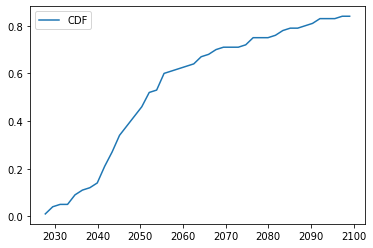

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

count, bins_count = np.histogram([2200 if t > 2200 else t for t in tai_years], bins=100)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
  
bins = [b for b in bins_count[1:] if b <= 2100]
plt.plot(bins, cdf[:len(bins)], label='CDF')
plt.legend()

## TODO

* Graph parameters w/ ~10 FLOPS per parameter
* Graph "Willingness to spend by year", "FLOPS per dollar by year", "Parameters by year", "Data size by year"[^1]
* Fix Ajeya parameters
* Documentation for the numbers

-

[1]: Graph data size assuming Chinchilla scaling
